In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import plotly.offline as py
plt.style.use('fivethirtyeight')

In [ ]:

#Get the Stock Quote: The price of a stock as quoted on an exchange
df = web.DataReader('AAPL', data_source='yahoo', start='2020-01-02', end='2021-01-05') #end = '2017-12-31', format = 'YYYY-MM-DD'
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.333511
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.610840
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385
...,...,...,...,...,...,...
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.520477
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.492020


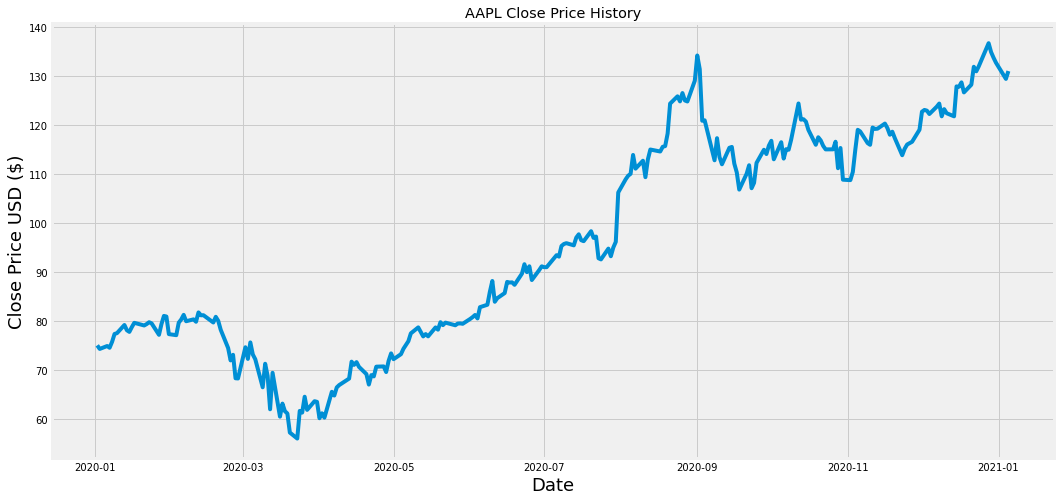

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('AAPL Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
ShortEMA = df.Close.ewm(span=9,adjust=False).mean()
MidEMA = df.Close.ewm(span=21,adjust=False).mean()
LongEMA = df.Close.ewm(span=55,adjust=False).mean()
#ShortGold = df.Close.ewm(span=50,adjust=False).mean()
#LongGold = df.Close.ewm(span=200,adjust=False).mean()

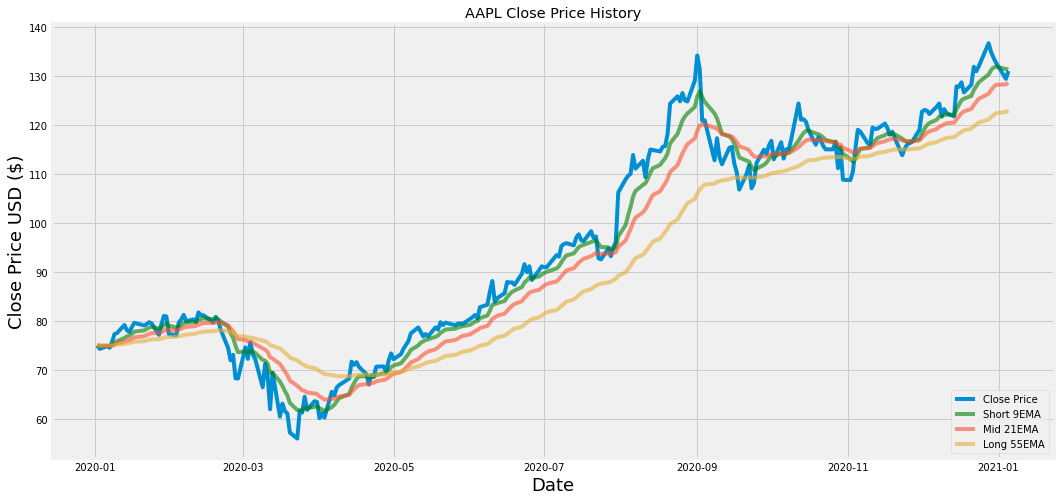

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('AAPL Close Price History')
plt.plot(df['Close'],label='Close Price')
plt.plot(ShortEMA, label='Short EMA',color='green',alpha=0.6)
plt.plot(MidEMA, label='Mid EMA',alpha=0.6)
plt.plot(LongEMA, label='Long EMA',alpha=0.6)
plt.legend(['Close Price','Short 9EMA','Mid 21EMA', 'Long 55EMA'], loc='lower right')
#plt.plot(ShortGold, label='ShortGold',alpha=0.6,color='gold')
#plt.plot(LongGold, label='LongGold',alpha=0.6)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
df['Short EMA']=ShortEMA
df['Mid EMA']=MidEMA
df['Long EMA']=LongEMA

df

,High,Low,Open,Close,Volume,Adj Close,Short EMA,Mid EMA,Long EMA
Date,,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.333511,75.087502,75.087502,75.087502
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.610840,74.941501,75.021138,75.061430
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395,74.943200,75.014670,75.057450
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442,74.874061,74.976746,75.041024
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385,75.058749,75.051360,75.068041
...,...,...,...,...,...,...,...,...,...
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762,131.219530,127.155009,121.604454
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.520477,131.719624,127.751827,122.037152
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.492020,131.913700,128.200752,122.417611


In [ ]:
def sell_buy(data):
  buy_list=[]
  sell_list=[]
  long_flag=False
  short_flag=False

  for i in range(0,len(data)):
    if data['Mid EMA'][i] < data['Long EMA'][i] and data ['Short EMA'][i]< data ['Mid EMA'][i] and long_flag == False and short_flag == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      short_flag=True
    elif short_flag==True and data ['Short EMA'][i] > data ['Mid EMA'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      short_flag  = False
    elif data['Mid EMA'][i] > data['Long EMA'][i] and data ['Short EMA'][i]> data ['Mid EMA'][i] and long_flag == False and short_flag == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      long_flag=True
    elif long_flag==True and data ['Short EMA'][i] < data ['Mid EMA'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      long_flag  = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

  return (buy_list,sell_list)



In [ ]:
df['Buy']= sell_buy(df)[0]
df['Sell']= sell_buy(df)[1]
df[['Buy','Sell']]

,Buy,Sell
Date,,
2020-01-02,NaN,NaN
2020-01-03,74.357498,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,NaN,75.797501
...,...,...
2020-12-29,NaN,NaN
2020-12-30,NaN,NaN
2020-12-31,NaN,NaN


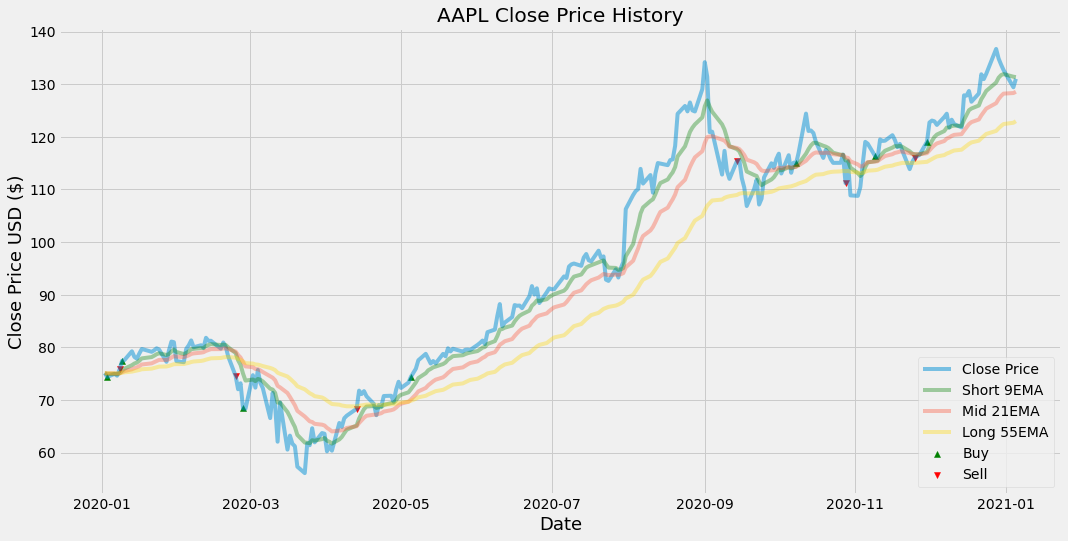

In [ ]:
plt.figure(figsize=(16,8))
plt.title('AAPL Close Price History')
plt.plot(df['Close'],label='Close Price',alpha=0.5)
plt.plot(ShortEMA, label='Short EMA',color='green',alpha=0.35)
plt.plot(MidEMA, label='Mid EMA',alpha=0.35)
plt.plot(LongEMA, label='Long EMA',color='gold',alpha=0.35)
plt.scatter(df.index, df['Buy'], color = 'green', marker='^',alpha=1)
plt.scatter(df.index, df['Sell'], color = 'red', marker='v',alpha=1)
plt.legend(['Close Price','Short 9EMA','Mid 21EMA', 'Long 55EMA','Buy' ,'Sell'], loc='lower right')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
df['Buy']= sell_buy(df)[0]
df['Sell']= sell_buy(df)[1]

sellsum = df['Sell'].sum(min_count=0)
buysum = df['Buy'].sum(min_count=0)
last_day_price= df['Close'].iloc[-1]
profit= float (sellsum) - float (buysum) + float(last_day_price)
print(profit)
df

47.37998962402344


,High,Low,Open,Close,Volume,Adj Close,Short EMA,Mid EMA,Long EMA,Buy,Sell
Date,,,,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.444603,75.087502,75.087502,75.087502,NaN,NaN
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.720840,74.941501,75.021138,75.061430,74.357498,NaN
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.308266,74.943200,75.014670,75.057450,NaN,NaN
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.958794,74.874061,74.976746,75.041024,NaN,NaN
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.148521,75.058749,75.051360,75.068041,NaN,75.797501
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.869995,131.219530,127.155009,121.604454,NaN,NaN
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.720001,131.719624,127.751827,122.037152,NaN,NaN
2020-12-31,134.740005,131.720001,134.080002,132.690002,98990400.0,132.690002,131.913700,128.200752,122.417611,NaN,NaN
